In [111]:
# import the required packages

In [112]:
import pandas as pd

In [113]:
import seaborn as sns

In [114]:
import matplotlib.pyplot as plt

In [115]:
#Import Sales Data
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\MBAN 6110\sales_data.csv")

In [116]:
# Get an overview of the data by looking at the different columns, their data types, and their descriptive statistics

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [118]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [119]:
# Taking a look at the first 10 and last 10 records in the data to understand how it is structured

In [120]:
df.head(10)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
7,Product_18,Region_7,19.27,9.0,2022-01-08
8,Product_16,Region_9,30.70,14.0,2022-01-09
9,Product_9,Region_2,264.05,7.0,2022-01-10


In [121]:
df.tail(10)

,Product,Region,Price,Units Sold,Sale Date
1040,Product_44,Region_9,101.69,NaN,2024-09-11
1041,Product_30,Region_3,8.76,13.0,2024-06-23
1042,Product_6,Region_9,14.36,16.0,2024-08-13
1043,Product_20,Region_6,58.50,9.0,2022-10-06
1044,Product_48,Region_10,23.57,6.0,2024-02-28
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27
1049,Product_16,Region_2,69.30,8.0,2024-02-23


In [122]:
# Drop the duplicate values in the data as to not provide one area with extra values that could scue the data

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df.sort_values(by='Sale Date', ascending=True)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
996,Product_36,NaN,46.19,9.0,2024-09-23
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


<Axes: xlabel='Product', ylabel='Count'>

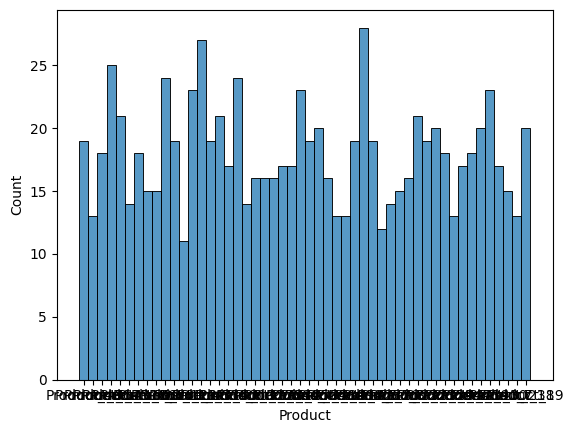

In [125]:
sns.histplot(df['Product'])

<Axes: xlabel='Region', ylabel='Count'>

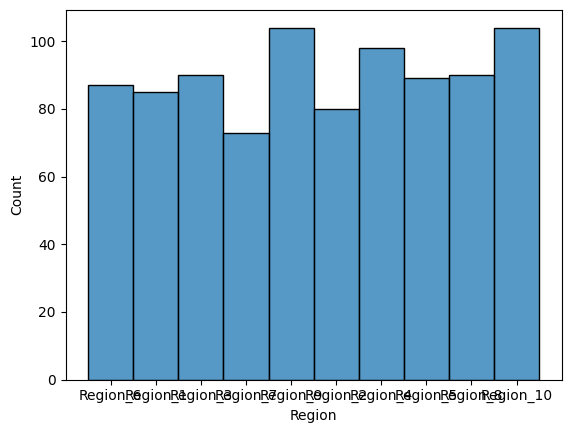

In [126]:
sns.histplot(df['Region'])

<Axes: xlabel='Price', ylabel='Count'>

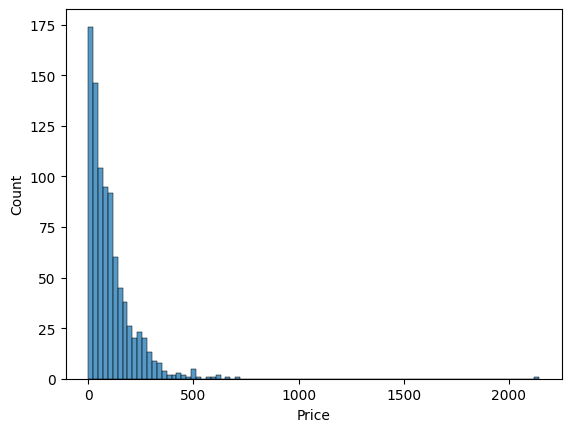

In [127]:
sns.histplot(df['Price'])

In [128]:
df[df['Price'] > 1000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [129]:
df.drop(969, axis = 0, inplace = True)

<Axes: xlabel='Price', ylabel='Count'>

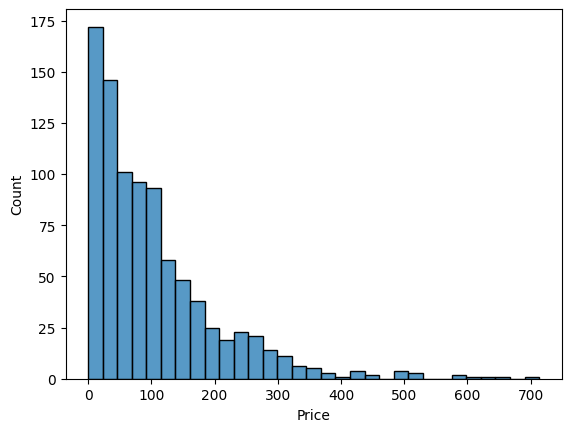

In [130]:
sns.histplot(df['Price'])

<Axes: xlabel='Units Sold', ylabel='Count'>

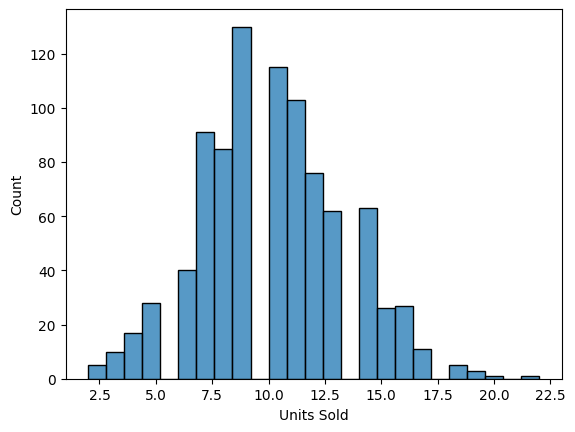

In [131]:
sns.histplot(df['Units Sold'])

<Axes: >

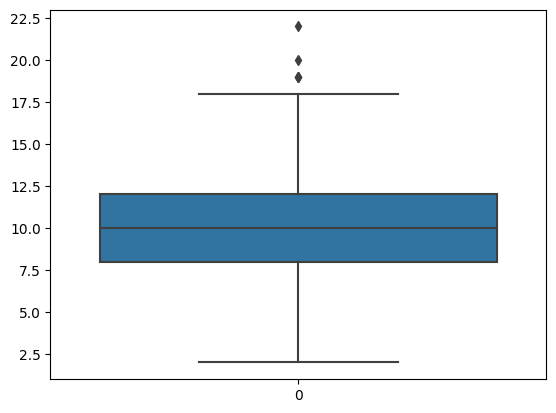

In [132]:
sns.boxplot(df['Units Sold'])

In [133]:
df['Region'] = df['Region'].fillna("Other")

In [134]:
df['Product'] = df['Product'].fillna("Other")

In [135]:
df['Price'] = df['Price'].fillna(df['Price'].median())

In [136]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].median())

In [137]:
df['Revenue'] = df['Units Sold'] * df['Price']

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     999 non-null    object 
 1   Region      999 non-null    object 
 2   Price       999 non-null    float64
 3   Units Sold  999 non-null    float64
 4   Sale Date   999 non-null    object 
 5   Revenue     999 non-null    float64
dtypes: float64(3), object(3)
memory usage: 86.9+ KB


In [139]:
df.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date,Revenue
count,999,999,999.000000,999.000000,999,999.000000
unique,51,11,NaN,NaN,999,NaN
top,Other,Region_9,NaN,NaN,2022-01-01,NaN
freq,100,104,NaN,NaN,1,NaN
mean,NaN,NaN,101.368639,10.066066,NaN,1007.316436
std,NaN,NaN,98.589915,3.000942,NaN,1045.559304
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,33.650000,8.000000,NaN,295.585000
50%,NaN,NaN,76.010000,10.000000,NaN,737.330000
75%,NaN,NaN,133.080000,12.000000,NaN,1333.355000


In [140]:
df.head(10)

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,Other,Region_6,75.96,10.0,2022-01-01,759.60
1,Other,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
5,Product_45,Region_1,8.63,11.0,2022-01-06,94.93
6,Product_31,Region_3,23.73,6.0,2022-01-07,142.38
7,Product_18,Region_7,19.27,9.0,2022-01-08,173.43
8,Product_16,Region_9,30.70,14.0,2022-01-09,429.80
9,Product_9,Region_2,264.05,7.0,2022-01-10,1848.35


In [141]:
df.groupby('Region')['Units Sold'].sum()

Region
Other        1007.0
Region_1      866.0
Region_10    1059.0
Region_2      801.0
Region_3      913.0
Region_4      960.0
Region_5      900.0
Region_6      876.0
Region_7      727.0
Region_8      888.0
Region_9     1059.0
Name: Units Sold, dtype: float64

In [142]:
df.groupby('Region')['Price'].median()

Region
Other        76.010
Region_1     76.010
Region_10    76.010
Region_2     80.735
Region_3     76.010
Region_4     76.010
Region_5     76.010
Region_6     59.210
Region_7     76.010
Region_8     76.010
Region_9     86.085
Name: Price, dtype: float64

In [143]:
df.groupby('Region')['Revenue'].sum()

Region
Other        106170.83
Region_1      82644.30
Region_10    100498.37
Region_2      96598.02
Region_3      77641.36
Region_4     100225.02
Region_5      87897.25
Region_6      72756.97
Region_7      63597.38
Region_8     107507.60
Region_9     110772.02
Name: Revenue, dtype: float64

<Axes: xlabel='Region', ylabel='Revenue'>

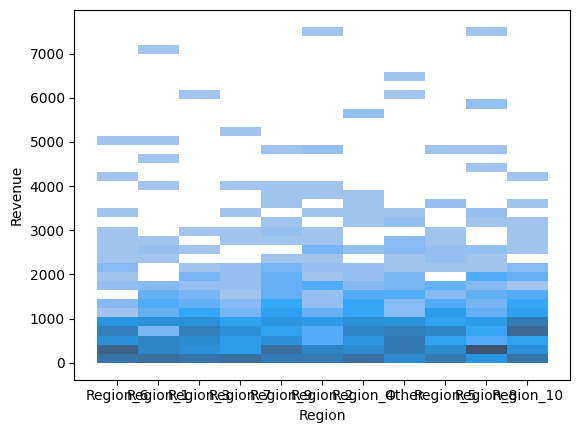

In [144]:
sns.histplot(data = df, x = 'Region', y = 'Revenue')

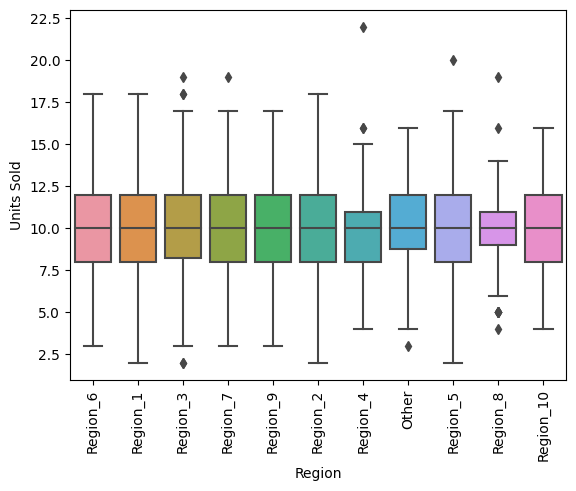

In [145]:
sns.boxplot(data = df, x = 'Region', y = 'Units Sold') 
plt.xticks(rotation = 90)
plt.show()

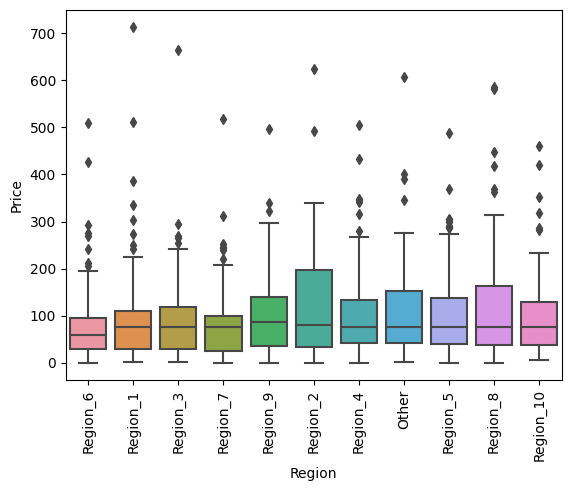

In [146]:
sns.boxplot(data = df, x = 'Region', y = 'Price')
plt.xticks(rotation = 90)
plt.show()

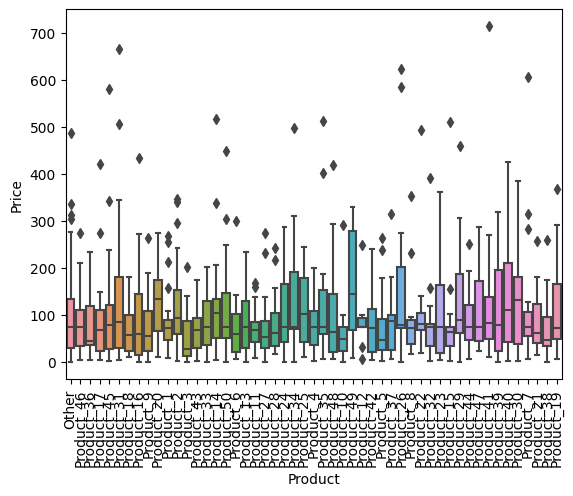

In [147]:
sns.boxplot(data = df, x = 'Product', y = 'Price')
plt.xticks(rotation = 90)
plt.show()

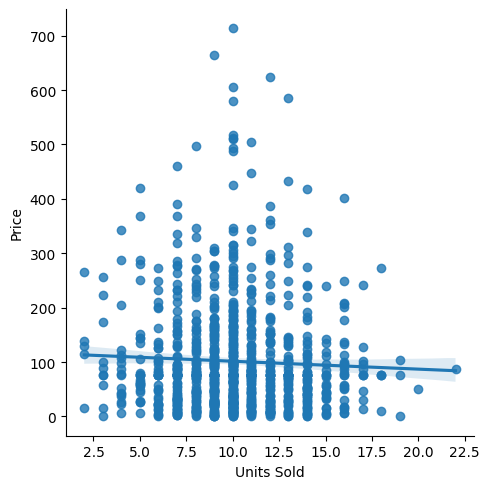

In [148]:
sns.lmplot(data = df, x = 'Units Sold', y = 'Price')

In [149]:
# The number of units sold is consistent across different regions and does not vary much
# however the price that the units are being sold at varies heavily depending on which region they are selling to


You are a data analyst at an e-commerce company that sells a variety of products. Your company wants to better understand how various products perform across regions, in order to devise its sales strategy for next year.

You have been provided with data includes information about the product, the region where the product was sold, the price of the product, the number of units sold, and the date of the sale.

Your task is to clean the data as you see fit, and conduct exploratory analysis which will help the company build a sales strategy for the following year.

In addition to the analysis, be sure to answer the following questions:

1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?